# SPACE SERVER DATASET ANALYSIS

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import os

In [87]:
SD=pd.read_csv('Space.csv')
SD.shape

(10000, 18)

In [88]:
SD.head()

objid          ra       dec         u         g         r  \
0  1237650000000000000  183.531326  0.089693  19.47406  17.04240  15.94699   
1  1237650000000000000  183.598371  0.135285  18.66280  17.21449  16.67637   
2  1237650000000000000  183.680207  0.126185  19.38298  18.19169  17.47428   
3  1237650000000000000  183.870529  0.049911  17.76536  16.60272  16.16116   
4  1237650000000000000  183.883288  0.102557  17.55025  16.26342  16.43869   

          i         z  run  rerun  camcol  field            specobjid   class  \
0  15.50342  15.22531  752    301       4    267  3722360000000000000    STAR   
1  16.48922  16.39150  752    301       4    267   363814000000000000    STAR   
2  17.08732  16.80125  752    301       4    268   323274000000000000  GALAXY   
3  15.98233  15.90438  752    301       4    269  3722370000000000000    STAR   
4  16.55492  16.61326  752    301       4    269  3722370000000000000    STAR   

   redshift  plate    mjd  fiberid  
0 -0.000009   3306  54922      491  
1 -0.000055    323  51615      541  
2  0.123111    287  52023      513  
3 -0.000111   3306  54922      510  
4  0.000590   3306  54922      512

In [89]:
SD.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [90]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  int64  
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  uint64 
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 1.4+ MB


Only class is in character type all the other attributes are numerical.

In [91]:
SD.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

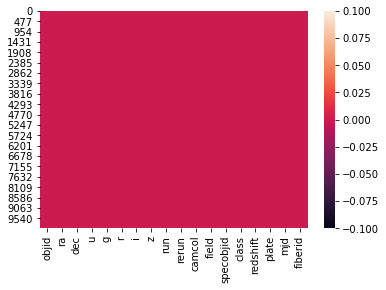

In [92]:
sns.heatmap(SD.isnull())

There is no null data present i.e. none of the data is missing.

In [93]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
SD['class']=LE.fit_transform(SD['class'])
SD.head()

objid          ra       dec         u         g         r  \
0  1237650000000000000  183.531326  0.089693  19.47406  17.04240  15.94699   
1  1237650000000000000  183.598371  0.135285  18.66280  17.21449  16.67637   
2  1237650000000000000  183.680207  0.126185  19.38298  18.19169  17.47428   
3  1237650000000000000  183.870529  0.049911  17.76536  16.60272  16.16116   
4  1237650000000000000  183.883288  0.102557  17.55025  16.26342  16.43869   

          i         z  run  rerun  camcol  field            specobjid  class  \
0  15.50342  15.22531  752    301       4    267  3722360000000000000      2   
1  16.48922  16.39150  752    301       4    267   363814000000000000      2   
2  17.08732  16.80125  752    301       4    268   323274000000000000      0   
3  15.98233  15.90438  752    301       4    269  3722370000000000000      2   
4  16.55492  16.61326  752    301       4    269  3722370000000000000      2   

   redshift  plate    mjd  fiberid  
0 -0.000009   3306  54922      491  
1 -0.000055    323  51615      541  
2  0.123111    287  52023      513  
3 -0.000111   3306  54922      510  
4  0.000590   3306  54922      512

In [94]:
SD['class'].unique()

array([2, 0, 1])

In [95]:
SD['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

In [96]:
list(LE.classes_)

['GALAXY', 'QSO', 'STAR']

We changed the 'class' column to numeric using the LabelEncoder

In [97]:
SD.objid.unique()

array([1237650000000000000], dtype=int64)

In [98]:
SD.specobjid.nunique()

6349

In [99]:
SD.redshift.nunique()

9637

In [100]:
SD.head()

objid          ra       dec         u         g         r  \
0  1237650000000000000  183.531326  0.089693  19.47406  17.04240  15.94699   
1  1237650000000000000  183.598371  0.135285  18.66280  17.21449  16.67637   
2  1237650000000000000  183.680207  0.126185  19.38298  18.19169  17.47428   
3  1237650000000000000  183.870529  0.049911  17.76536  16.60272  16.16116   
4  1237650000000000000  183.883288  0.102557  17.55025  16.26342  16.43869   

          i         z  run  rerun  camcol  field            specobjid  class  \
0  15.50342  15.22531  752    301       4    267  3722360000000000000      2   
1  16.48922  16.39150  752    301       4    267   363814000000000000      2   
2  17.08732  16.80125  752    301       4    268   323274000000000000      0   
3  15.98233  15.90438  752    301       4    269  3722370000000000000      2   
4  16.55492  16.61326  752    301       4    269  3722370000000000000      2   

   redshift  plate    mjd  fiberid  
0 -0.000009   3306  54922      491  
1 -0.000055    323  51615      541  
2  0.123111    287  52023      513  
3 -0.000111   3306  54922      510  
4  0.000590   3306  54922      512

In [101]:
SD.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

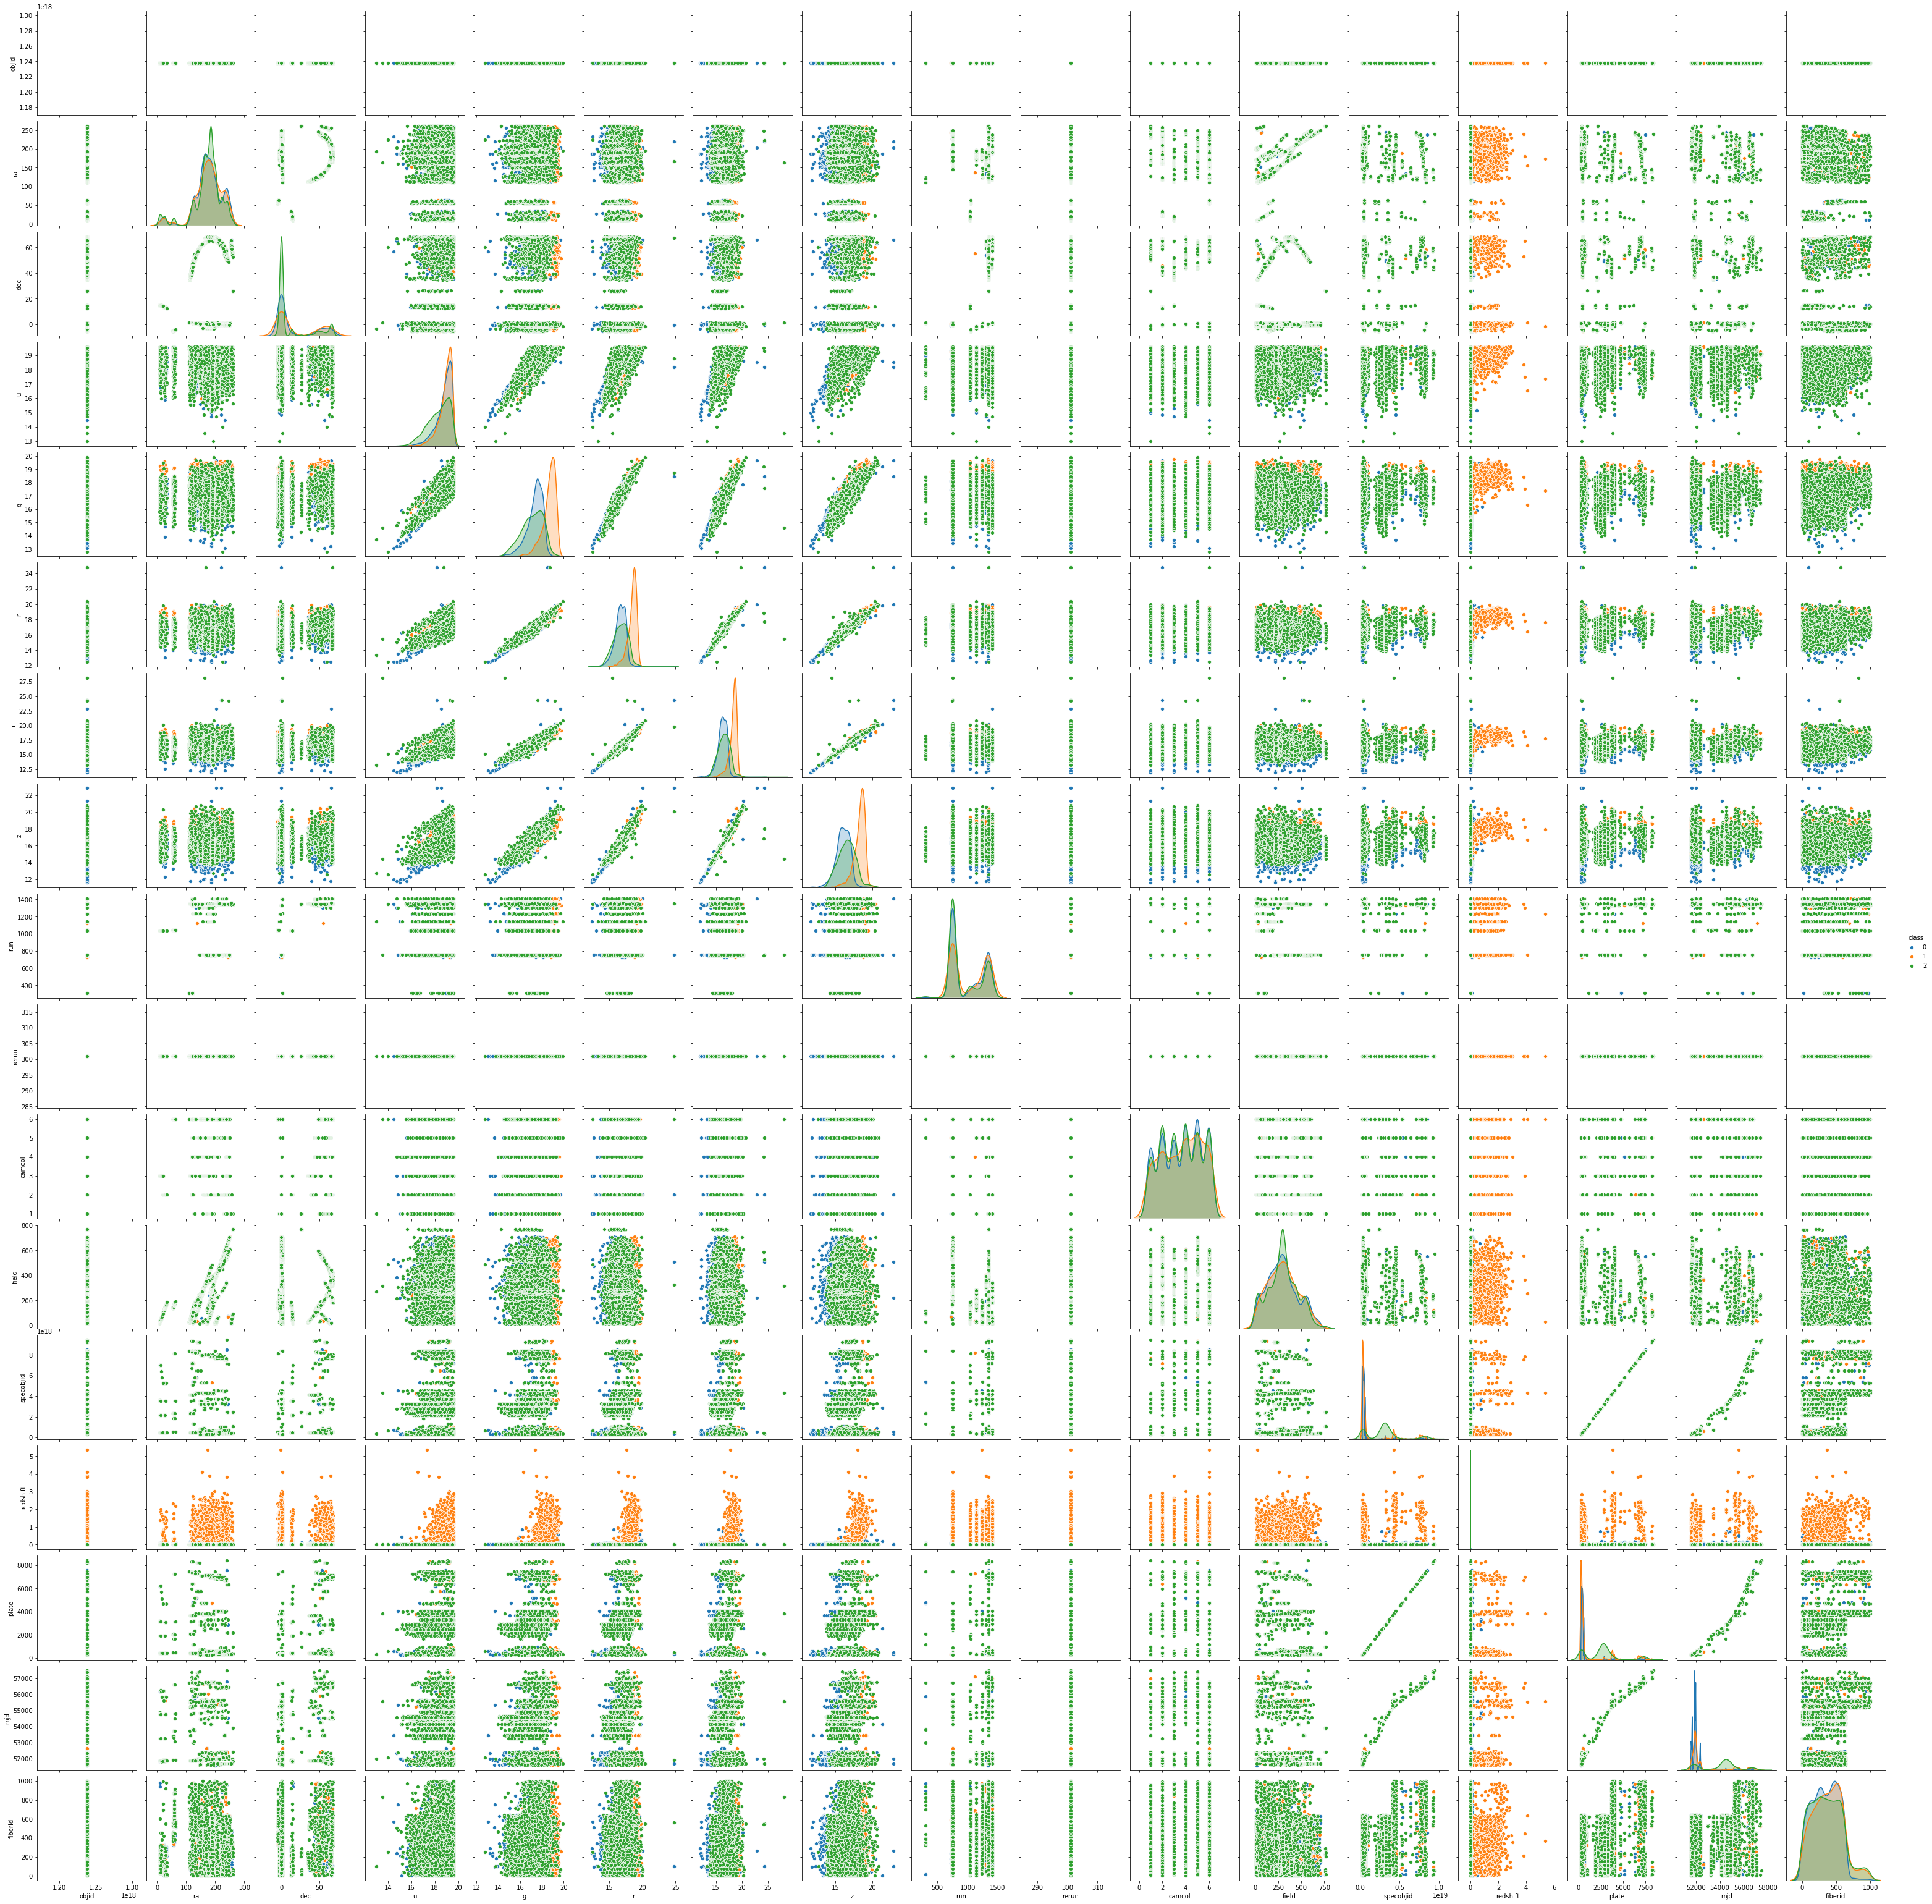

In [104]:
sns.pairplot(SD,hue='class')

In [105]:
SD.corr()

objid            ra           dec             u  \
objid      1.000000e+00  2.524419e-14 -1.937483e-15  5.581214e-14   
ra         2.524419e-14  1.000000e+00  3.596046e-03  3.123756e-02   
dec       -1.937483e-15  3.596046e-03  1.000000e+00  3.527932e-02   
u          5.581214e-14  3.123756e-02  3.527932e-02  1.000000e+00   
g          1.001149e-13  4.390863e-02  6.187471e-02  8.492320e-01   
r          2.995673e-14  4.710290e-02  6.340395e-02  6.923790e-01   
i          2.212198e-14  4.573107e-02  5.829189e-02  6.026302e-01   
z         -4.107700e-14  4.294957e-02  5.687030e-02  5.514828e-01   
run       -1.553011e-14 -9.274056e-02  7.783849e-01  3.822910e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.921887e-15 -6.293831e-03  1.146139e-01  9.944672e-03   
field      5.938881e-16  5.946996e-01 -1.314714e-01  8.547880e-03   
specobjid -1.829075e-15 -9.532711e-02  8.834533e-02 -1.294293e-01   
class     -3.355500e-15 -4.321896e-02 -5.891815e-02 -2.690437e-01   
redshift   5.085882e-16  3.030740e-02  6.702076e-02  1.637409e-01   
plate      4.156934e-16 -9.532933e-02  8.834153e-02 -1.294304e-01   
mjd       -3.317582e-15 -8.688726e-02  6.614663e-02 -1.687927e-01   
fiberid    4.665195e-15  5.748482e-02  1.550124e-01  1.130112e-02   

                      g             r             i             z  \
objid      1.001149e-13  2.995673e-14  2.212198e-14 -4.107700e-14   
ra         4.390863e-02  4.710290e-02  4.573107e-02  4.294957e-02   
dec        6.187471e-02  6.340395e-02  5.829189e-02  5.687030e-02   
u          8.492320e-01  6.923790e-01  6.026302e-01  5.514828e-01   
g          1.000000e+00  9.581062e-01  9.074187e-01  8.796222e-01   
r          9.581062e-01  1.000000e+00  9.776718e-01  9.691967e-01   
i          9.074187e-01  9.776718e-01  1.000000e+00  9.815066e-01   
z          8.796222e-01  9.691967e-01  9.815066e-01  1.000000e+00   
run        5.844630e-02  5.726060e-02  4.976478e-02  4.825225e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.022304e-02  1.074725e-02  1.346079e-02  1.092981e-02   
field      1.465110e-02  1.713294e-02  1.978147e-02  1.824845e-02   
specobjid -5.497908e-02  1.978831e-02  7.295994e-02  1.123981e-01   
class     -9.921163e-02  4.962769e-02  1.467908e-01  2.157584e-01   
redshift   4.075763e-01  4.410797e-01  4.314500e-01  4.240342e-01   
plate     -5.498078e-02  1.978671e-02  7.295843e-02  1.123969e-01   
mjd       -9.277155e-02 -9.344506e-03  5.089616e-02  9.565845e-02   
fiberid    4.718739e-02  6.108141e-02  6.997739e-02  6.797999e-02   

                    run  rerun        camcol         field     specobjid  \
objid     -1.553011e-14    NaN  1.921887e-15  5.938881e-16 -1.829075e-15   
ra        -9.274056e-02    NaN -6.293831e-03  5.946996e-01 -9.532711e-02   
dec        7.783849e-01    NaN  1.146139e-01 -1.314714e-01  8.834533e-02   
u          3.822910e-02    NaN  9.944672e-03  8.547880e-03 -1.294293e-01   
g          5.844630e-02    NaN  1.022304e-02  1.465110e-02 -5.497908e-02   
r          5.726060e-02    NaN  1.074725e-02  1.713294e-02  1.978831e-02   
i          4.976478e-02    NaN  1.346079e-02  1.978147e-02  7.295994e-02   
z          4.825225e-02    NaN  1.092981e-02  1.824845e-02  1.123981e-01   
run        1.000000e+00    NaN  1.518143e-01 -4.638975e-01  9.360436e-02   
rerun               NaN    NaN           NaN           NaN           NaN   
camcol     1.518143e-01    NaN  1.000000e+00 -6.792055e-02  4.080943e-02   
field     -4.638975e-01    NaN -6.792055e-02  1.000000e+00 -9.372375e-02   
specobjid  9.360436e-02    NaN  4.080943e-02 -9.372375e-02  1.000000e+00   
class     -7.816172e-02    NaN -6.185920e-03  7.712555e-03  5.854925e-01   
redshift   5.905595e-02    NaN  6.833537e-03  1.541360e-02 -3.808992e-02   
plate      9.360107e-02    NaN  4.079461e-02 -9.372323e-02  1.000000e+00   
mjd        7.035433e-02    NaN  2.628396e-02 -8.655805e-02  9.668799e-01   
fiberid    1.385659e-01   

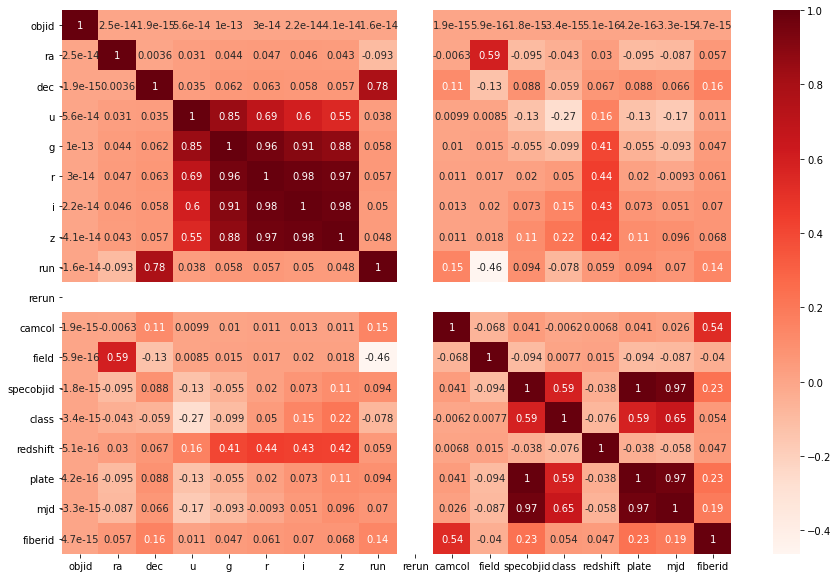

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(SD.corr(),cmap='Reds',annot=True)

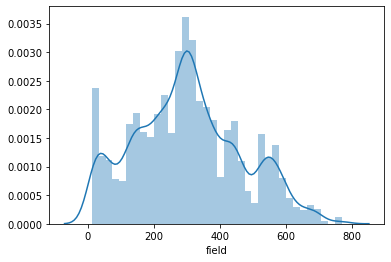

In [107]:
sns.distplot(SD['field'])

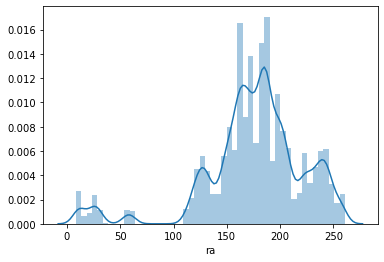

In [108]:
sns.distplot(SD['ra'])

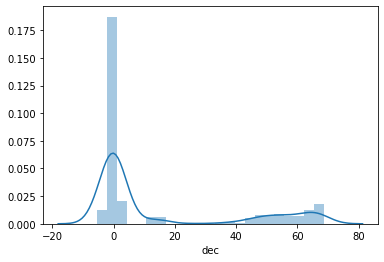

In [109]:
sns.distplot(SD['dec'])

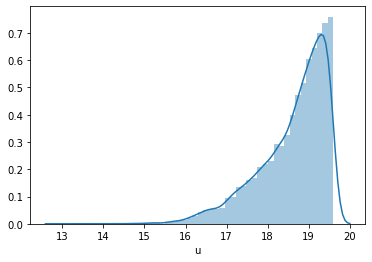

In [110]:
sns.distplot(SD['u'])

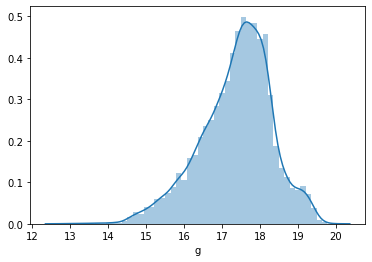

In [111]:
sns.distplot(SD['g'])

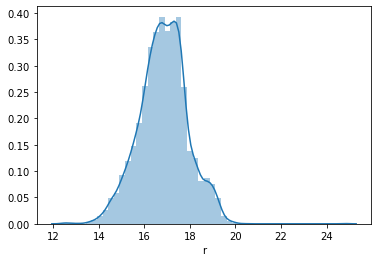

In [112]:
sns.distplot(SD['r'])

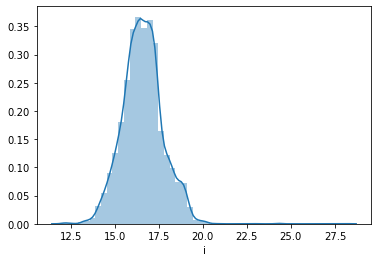

In [113]:
sns.distplot(SD['i'])

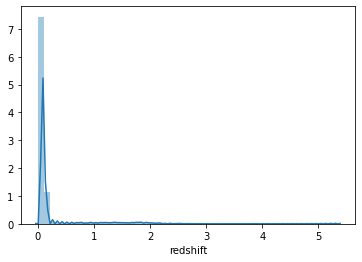

In [114]:
sns.distplot(SD['redshift'])

In [118]:
SD['r'].nunique()

9852

In [119]:
SD.head()

objid          ra       dec         u         g         r  \
0  1237650000000000000  183.531326  0.089693  19.47406  17.04240  15.94699   
1  1237650000000000000  183.598371  0.135285  18.66280  17.21449  16.67637   
2  1237650000000000000  183.680207  0.126185  19.38298  18.19169  17.47428   
3  1237650000000000000  183.870529  0.049911  17.76536  16.60272  16.16116   
4  1237650000000000000  183.883288  0.102557  17.55025  16.26342  16.43869   

          i         z  run  rerun  camcol  field            specobjid  class  \
0  15.50342  15.22531  752    301       4    267  3722360000000000000      2   
1  16.48922  16.39150  752    301       4    267   363814000000000000      2   
2  17.08732  16.80125  752    301       4    268   323274000000000000      0   
3  15.98233  15.90438  752    301       4    269  3722370000000000000      2   
4  16.55492  16.61326  752    301       4    269  3722370000000000000      2   

   redshift  plate    mjd  fiberid  
0 -0.000009   3306  54922      491  
1 -0.000055    323  51615      541  
2  0.123111    287  52023      513  
3 -0.000111   3306  54922      510  
4  0.000590   3306  54922      512

In [120]:
print(SD['run'].unique())
print(SD['rerun'].unique())
print(SD['camcol'].unique())

[ 752  756  308  727  745 1035 1045 1140 1231 1332 1334 1302 1239 1119
 1331 1345 1350 1404 1412 1336 1402 1411 1356]
[301]
[4 2 1 5 6 3]


In [121]:
SD['objid'].unique()

array([1237650000000000000], dtype=int64)

In [122]:
SD1=SD.drop(columns=['objid','rerun'],axis=1)

In [123]:
SD1.shape

(10000, 16)

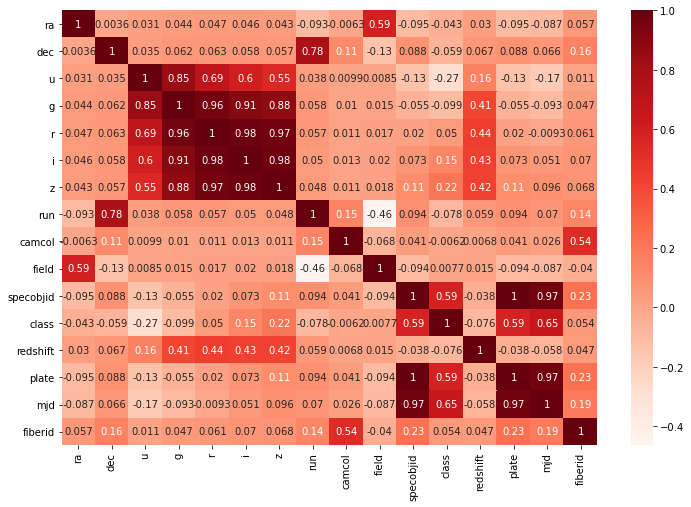

In [124]:
plt.figure(figsize=(12,8))
sns.heatmap(SD1.corr(),cmap='Reds',annot=True)

In [125]:
SD1.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [126]:
SD1.isnull().sum()

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [133]:
x=SD1.drop(columns=['class'],axis=1)
x.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

   run  camcol  field            specobjid  redshift  plate    mjd  fiberid  
0  752       4    267  3722360000000000000 -0.000009   3306  54922      491  
1  752       4    267   363814000000000000 -0.000055    323  51615      541  
2  752       4    268   323274000000000000  0.123111    287  52023      513  
3  752       4    269  3722370000000000000 -0.000111   3306  54922      510  
4  752       4    269  3722370000000000000  0.000590   3306  54922      512

In [138]:
y=SD1['class']
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [139]:
print(x.shape)
print(y.shape)

(10000, 15)
(10000,)


In [156]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45,stratify=y)

In [159]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 15)
(2000, 15)
(8000,)
(2000,)


In [161]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 22}


In [162]:
parameters={'C':[1,10],'random_state': range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [163]:
KNN=KNeighborsClassifier(n_neighbors=22)
SVC=SVC()
DTC=DecisionTreeClassifier()
RFC=RandomForestClassifier()
LR=LogisticRegression(random_state=42)

In [164]:
model=[LR,RFC,KNN,DTC,SVC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score Of', m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('****************************************************************')
    print('\n')

Accuracy Score Of LogisticRegression(random_state=42) is:
0.9785
[[972   2  26]
 [ 10 160   0]
 [  3   2 825]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.98      0.94      0.96       170
           2       0.97      0.99      0.98       830

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.97      2000
weighted avg       0.98      0.98      0.98      2000

****************************************************************


Accuracy Score Of RandomForestClassifier() is:
0.9905
[[992   4   4]
 [ 11 159   0]
 [  0   0 830]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.98      0.94      0.95       170
           2       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg   